Sustain but with a combination of left and right regions.

How? we will begin by just taking the mean of the left and riught. We could do the sum but this feels wrong.

We also need to think what to do with those that dont have left and right



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from pySuStaIn import ZscoreSustain

import mrmr


c:\Users\huw\OneDrive\Documents\Research_Internship\MPhys_scripts\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
data_dir = 'data'

df = pd.read_csv(os.path.join(data_dir, 'huw_whole_df.csv'), index_col = 0)

dx_map = {
    0: 0,
    1 : 1,
    2 : 2,
    3 : 2,
}


df['DX_bl'] = df['DX_bl'].map(dx_map)

df['DX_bl'].value_counts()

df.loc[(df['ABETA_bl'] == 1700) & (df['DX_bl'] == 2), 'DX_bl'] = 3


df_1 = df.drop(columns=['PTEDUCAT','TAU_bl','PTAU_bl','ABETA_bl', 'MMSE_bl','EcogPtTotal_bl', 'LDELTOTAL_BL', 'mPACCdigit_bl', 'mPACCtrailsB_bl', 'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl','PTID', 'EXAMDATE', 'EXAMDATE_bl', 'DX','AGE', 'PTGENDER', 'PTRACCAT', 'FHQMOM', 'FHQDAD', 'FHQMOMAD', 'FHQDADAD', 'RAVLT_perc_forgetting_bl'])

df_1

,DX_bl,SUVr_ACC_pre_L.nii,SUVr_ACC_pre_R.nii,SUVr_ACC_sub_L.nii,SUVr_ACC_sub_R.nii,SUVr_ACC_sup_L.nii,SUVr_ACC_sup_R.nii,SUVr_Amygdala_L.nii,SUVr_Amygdala_R.nii,SUVr_Angular_L.nii,...,SUVr_Vermis_1_2.nii,SUVr_Vermis_3.nii,SUVr_Vermis_4_5.nii,SUVr_Vermis_6.nii,SUVr_Vermis_7.nii,SUVr_Vermis_8.nii,SUVr_Vermis_9.nii,SUVr_Vermis_10.nii,SUVr_VTA_L.nii,SUVr_VTA_R.nii
1,2,0.033800,0.042295,0.010627,0.008586,0.039320,0.038841,0.011054,0.014155,0.058692,...,0.003369,0.011351,0.030880,0.018253,0.009289,0.011917,0.008881,0.006231,0.000712,0.000659
2,2,0.056520,0.063619,0.016490,0.012617,0.057261,0.053242,0.013008,0.017184,0.108759,...,0.003325,0.011246,0.029007,0.016903,0.009108,0.012666,0.008033,0.006029,0.000770,0.000699
3,0,0.060682,0.068784,0.017864,0.013864,0.054272,0.053113,0.013620,0.016730,0.104904,...,0.003402,0.011694,0.033622,0.019224,0.010413,0.012902,0.007799,0.005730,0.000804,0.000760
4,2,0.042112,0.049571,0.011925,0.010232,0.044834,0.042373,0.011938,0.015462,0.067635,...,0.003367,0.011986,0.034076,0.019834,0.010011,0.012782,0.009789,0.006613,0.000748,0.000675
5,2,0.041158,0.046395,0.012714,0.009992,0.042674,0.039067,0.011457,0.013684,0.073826,...,0.002935,0.009448,0.028740,0.017897,0.009361,0.012595,0.008533,0.005170,0.000675,0.000675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,3,0.044351,0.052593,0.011514,0.010009,0.042117,0.045545,0.013725,0.016478,0.062204,...,0.003873,0.012135,0.034131,0.018864,0.008398,0.011478,0.009674,0.007555,0.000818,0.000764
543,3,0.036909,0.047695,0.011225,0.008871,0.040523,0.041999,0.011000,0.014486,0.076857,...,0.003308,0.010313,0.029413,0.016943,0.008936,0.011930,0.008579,0.006243,0.000678,0.000581
544,3,0.038544,0.048572,0.012500,0.010097,0.046125,0.047444,0.010035,0.012790,0.074429,...,0.003723,0.011469,0.026939,0.015693,0.008374,0.011329,0.008016,0.006976,0.000753,0.000723
545,3,0.029956,0.041714,0.009979,0.008269,0.035993,0.039143,0.010660,0.014074,0.065539,...,0.003486,0.011536,0.031103,0.017387,0.008620,0.010525,0.007063,0.005713,0.000815,0.000768


In [41]:
suvr_cols = [col for col in df.columns if col.startswith("SUVr")]

suvr_cols = [col.replace('SUVr_', '') for col in suvr_cols]

suvr_cols = [col.replace('.nii', '') for col in suvr_cols]

In [ ]:
lr = [col for col in suvr_cols if col.endswith('_L') or col.endswith('_R')]
non_lr = [col for col in suvr_cols if col not in lr]
print(len(lr)/2 + (len(non_lr)))



88.0
ACC_pre_L
ACC_pre_R
ACC_sub_L
ACC_sub_R
ACC_sup_L
ACC_sup_R
Amygdala_L
Amygdala_R
Angular_L
Angular_R
Calcarine_L
Calcarine_R
Caudate_L
Caudate_R
Cerebellum_3_L
Cerebellum_3_R
Cerebellum_4_5_L
Cerebellum_4_5_R
Cerebellum_6_L
Cerebellum_6_R
Cerebellum_7b_L
Cerebellum_7b_R
Cerebellum_8_L
Cerebellum_8_R
Cerebellum_9_L
Cerebellum_9_R
Cerebellum_10_L
Cerebellum_10_R
Cerebellum_Crus1_L
Cerebellum_Crus1_R
Cerebellum_Crus2_L
Cerebellum_Crus2_R
Cingulate_Mid_L
Cingulate_Mid_R
Cingulate_Post_L
Cingulate_Post_R
Cuneus_L
Cuneus_R
Frontal_Inf_Oper_L
Frontal_Inf_Oper_R
Frontal_Inf_Orb_2_L
Frontal_Inf_Orb_2_R
Frontal_Inf_Tri_L
Frontal_Inf_Tri_R
Frontal_Med_Orb_L
Frontal_Med_Orb_R
Frontal_Mid_2_L
Frontal_Mid_2_R
Frontal_Sup_2_L
Frontal_Sup_2_R
Frontal_Sup_Medial_L
Frontal_Sup_Medial_R
Fusiform_L
Fusiform_R
Heschl_L
Heschl_R
Hippocampus_L
Hippocampus_R
Insula_L
Insula_R
LC_L
LC_R
Lingual_L
Lingual_R
N_Acc_L
N_Acc_R
Occipital_Inf_L
Occipital_Inf_R
Occipital_Mid_L
Occipital_Mid_R
Occipital_Sup_L
Occ

In [71]:
df_2 = pd.DataFrame(index=df.index)

new_suvr_cols = []

for i in range(len(lr)):
    for j in range(i + 1, len(lr)):
        base_i = lr[i][:-2]
        base_j = lr[j][:-2]
        
        if base_i == base_j:
            mean = (df_1['SUVr_'+lr[i]+'.nii'] + df_1['SUVr_'+lr[j]+'.nii']) / 2
            df_2[base_i] = mean
            new_suvr_cols.append(base_i)
            
for col in non_lr:
    df_2[col] = df_1['SUVr_'+col+'.nii']
    new_suvr_cols.append(col)

In [72]:
for col in new_suvr_cols:
    print(col)

ACC_pre
ACC_sub
ACC_sup
Amygdala
Angular
Calcarine
Caudate
Cerebellum_3
Cerebellum_4_5
Cerebellum_6
Cerebellum_7b
Cerebellum_8
Cerebellum_9
Cerebellum_10
Cerebellum_Crus1
Cerebellum_Crus2
Cingulate_Mid
Cingulate_Post
Cuneus
Frontal_Inf_Oper
Frontal_Inf_Orb_2
Frontal_Inf_Tri
Frontal_Med_Orb
Frontal_Mid_2
Frontal_Sup_2
Frontal_Sup_Medial
Fusiform
Heschl
Hippocampus
Insula
LC
Lingual
N_Acc
Occipital_Inf
Occipital_Mid
Occipital_Sup
OFCant
OFClat
OFCmed
OFCpost
Olfactory
Pallidum
Paracentral_Lobule
ParaHippocampal
Parietal_Inf
Parietal_Sup
Postcentral
Precentral
Precuneus
Putamen
Rectus
Red_N
Rolandic_Oper
SN_pc
SN_pr
Supp_Motor_Area
SupraMarginal
Temporal_Inf
Temporal_Mid
Temporal_Pole_Mid
Temporal_Pole_Sup
Temporal_Sup
Thal_AV
Thal_IL
Thal_LGN
Thal_LP
Thal_MDl
Thal_MDm
Thal_MGN
Thal_PuA
Thal_PuI
Thal_PuL
Thal_PuM
Thal_Re
Thal_VA
Thal_VL
Thal_VPL
VTA
Raphe_D
Raphe_M
Vermis_1_2
Vermis_3
Vermis_4_5
Vermis_6
Vermis_7
Vermis_8
Vermis_9
Vermis_10


In [73]:
df = df.merge(df_2, left_index=True, right_index=True, how='left')

In [83]:
df_3 = df[new_suvr_cols + ['DX_bl']]

df_3.drop(['DX_bl'], axis=1)

,ACC_pre,ACC_sub,ACC_sup,Amygdala,Angular,Calcarine,Caudate,Cerebellum_3,Cerebellum_4_5,Cerebellum_6,...,Raphe_D,Raphe_M,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
1,0.038048,0.009606,0.039081,0.012605,0.071256,0.118833,0.046443,0.012202,0.054710,0.088160,...,0.001606,0.000634,0.003369,0.011351,0.030880,0.018253,0.009289,0.011917,0.008881,0.006231
2,0.060070,0.014553,0.055252,0.015096,0.133972,0.177231,0.056258,0.011387,0.051079,0.086121,...,0.001624,0.000522,0.003325,0.011246,0.029007,0.016903,0.009108,0.012666,0.008033,0.006029
3,0.064733,0.015864,0.053693,0.015175,0.118836,0.172528,0.045670,0.012109,0.055388,0.094233,...,0.001913,0.000608,0.003402,0.011694,0.033622,0.019224,0.010413,0.012902,0.007799,0.005730
4,0.045841,0.011078,0.043604,0.013700,0.084240,0.136790,0.055279,0.011085,0.054308,0.099386,...,0.001570,0.000580,0.003367,0.011986,0.034076,0.019834,0.010011,0.012782,0.009789,0.006613
5,0.043776,0.011353,0.040871,0.012570,0.085346,0.128913,0.038908,0.010261,0.051112,0.087694,...,0.001492,0.000534,0.002935,0.009448,0.028740,0.017897,0.009361,0.012595,0.008533,0.005170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.048472,0.010762,0.043831,0.015101,0.073510,0.138964,0.061131,0.013363,0.057152,0.100256,...,0.001824,0.000717,0.003873,0.012135,0.034131,0.018864,0.008398,0.011478,0.009674,0.007555
543,0.042302,0.010048,0.041261,0.012743,0.097817,0.133770,0.062531,0.010723,0.047471,0.081057,...,0.001454,0.000476,0.003308,0.010313,0.029413,0.016943,0.008936,0.011930,0.008579,0.006243
544,0.043558,0.011299,0.046784,0.011412,0.089860,0.142748,0.049322,0.012473,0.048748,0.075793,...,0.001862,0.000513,0.003723,0.011469,0.026939,0.015693,0.008374,0.011329,0.008016,0.006976
545,0.035835,0.009124,0.037568,0.012367,0.079501,0.137489,0.041306,0.012409,0.052891,0.087984,...,0.001784,0.000551,0.003486,0.011536,0.031103,0.017387,0.008620,0.010525,0.007063,0.005713


In [87]:
features = mrmr.mrmr_classif(df_3.drop(['DX_bl'], axis=1), df_3['DX_bl'], K = 10)
sustain_biomarkers = features + ['TAU_bl', 'PTAU_bl']

100%|██████████| 10/10 [00:00<00:00, 59.90it/s]


<Axes: xlabel='AGE', ylabel='ACC_pre'>

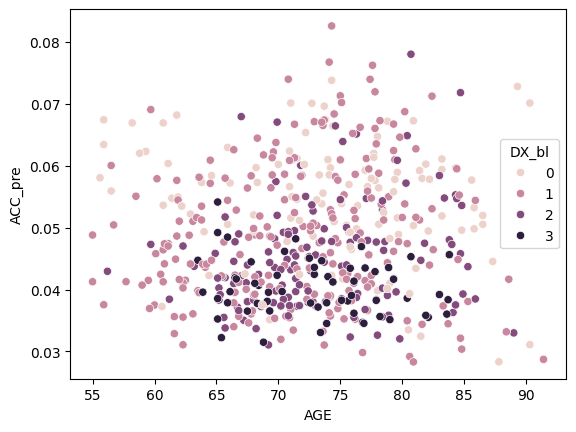

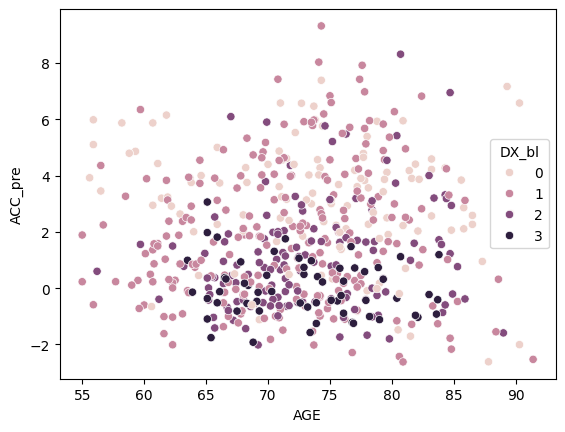

In [89]:
biomarkers_df = pd.DataFrame(df, copy=True)

biomarker_list = new_suvr_cols + ['TAU_bl', 'PTAU_bl']


for biomarker in biomarker_list:
    mean = biomarkers_df[biomarkers_df.DX_bl == 3][biomarker].mean()
    std = biomarkers_df[biomarkers_df.DX_bl == 3][biomarker].std()
    w_score = (df.loc[:,biomarker] - mean) / std
    
    biomarkers_df.loc[:,biomarker] = w_score

plt.figure(0)
sns.scatterplot(x=df.AGE,y=df['ACC_pre'],hue=df.DX_bl)
plt.figure(1)
sns.scatterplot(x=biomarkers_df.AGE,y=biomarkers_df['ACC_pre'],hue=biomarkers_df.DX_bl)


In [ ]:
N = len(sustain_biomarkers)

SuStaInLabels = sustain_biomarkers


Z_vals = np.array([[1,2,3]]*N)     # Z-scores for each biomarker
Z_max  = np.array([5]*N)    



Z_vals.shape: (12, 3)
sustain_input.stage_biomarker_index.shape: (1, 36)


In [96]:
N_startpoints = 10
N_S_max = 3
N_iterations_MCMC = int(1e4)
output_folder = os.path.join(os.getcwd(), 'left_right_csf_12feats') # we change this for each of the different tests
dataset_name = 'left_right_csf_12feats'

# Initiate the SuStaIn object
sustain_input = ZscoreSustain(
                              # biomarkers_df[suvr_cols[:3]].values,
                              biomarkers_df[sustain_biomarkers].values,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)
    
print("Z_vals.shape:", Z_vals.shape)
print("sustain_input.stage_biomarker_index.shape:", sustain_input.stage_biomarker_index.shape)

Z_vals.shape: (12, 3)
sustain_input.stage_biomarker_index.shape: (1, 36)


In [97]:
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()

Failed to find pickle file: c:\Users\huw\OneDrive\Documents\Research_Internship\adni-ml\left_right_csf_12feats\pickle_files\left_right_csf_12feats_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -13200.513141117568


MCMC Iteration: 100%|██████████| 10000/10000 [00:45<00:00, 217.71it/s]


Failed to find pickle file: c:\Users\huw\OneDrive\Documents\Research_Internship\adni-ml\left_right_csf_12feats\pickle_files\left_right_csf_12feats_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12729.96143785]
Overall ML likelihood is [-12729.96143785]


MCMC Iteration: 100%|██████████| 10000/10000 [01:37<00:00, 102.53it/s]


Failed to find pickle file: c:\Users\huw\OneDrive\Documents\Research_Internship\adni-ml\left_right_csf_12feats\pickle_files\left_right_csf_12feats_subtype2.pickle. Running SuStaIn model for 2 subtype.
Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12627.48136724]
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-12637.18287562]
Overall ML likelihood is [-12627.48136724]


MCMC Iteration: 100%|██████████| 10000/10000 [03:02<00:00, 54.86it/s]


Loading pickle file: c:\Users\huw\OneDrive\Documents\Research_Internship\adni-ml\left_right_csf_12feats/pickle_files/left_right_csf_12feats_subtype2.pickle


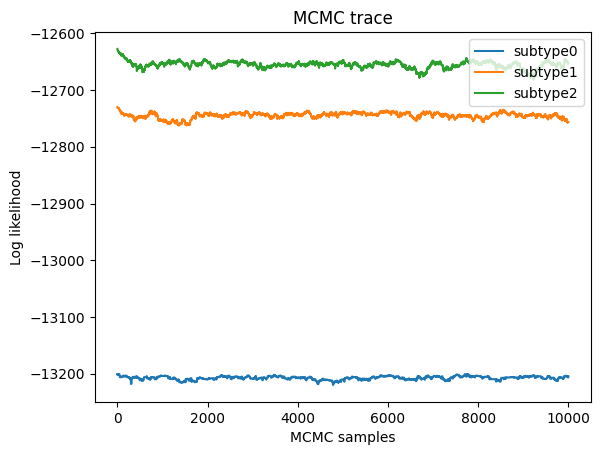

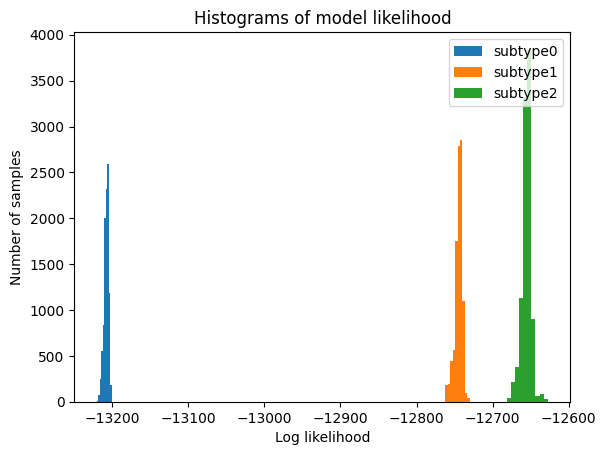

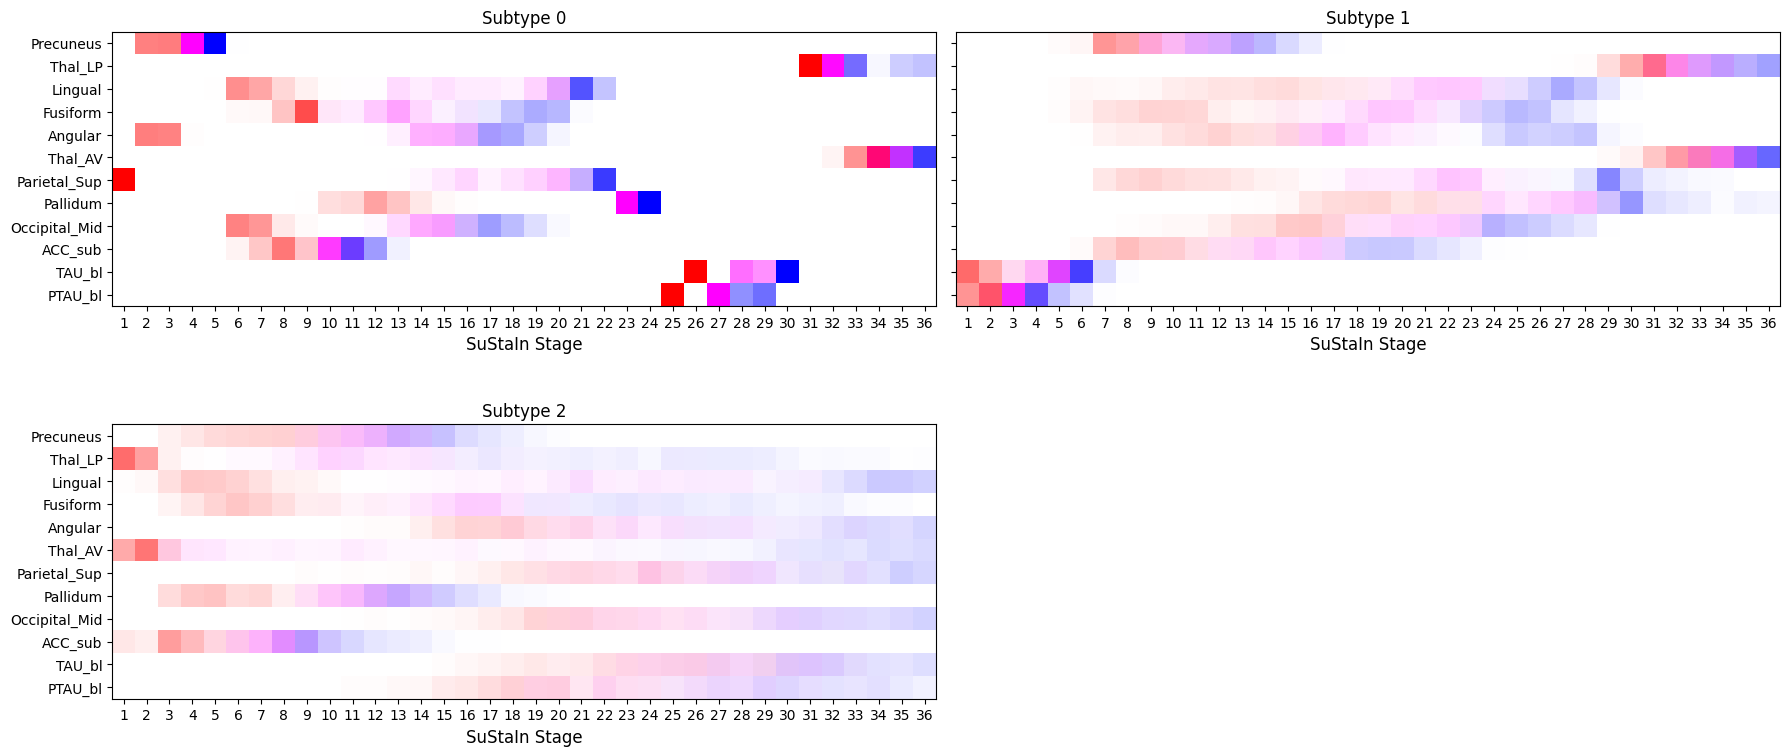

In [99]:
for s in range(N_S_max):
    # load pickle file (SuStaIn output) and get the sample log likelihood values
    pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
    pk = pd.read_pickle(pickle_filename_s)
    samples_likelihood = pk["samples_likelihood"]
    
    # plot the values as a line plot
    plt.figure(0)
    plt.plot(range(N_iterations_MCMC), samples_likelihood, label="subtype" + str(s))
    plt.legend(loc='upper right')
    plt.xlabel('MCMC samples')
    plt.ylabel('Log likelihood')
    plt.title('MCMC trace')
    
    # plot the values as a histogramp plot
    plt.figure(1)
    plt.hist(samples_likelihood, label="subtype" + str(s))
    plt.legend(loc='upper right')
    plt.xlabel('Log likelihood')  
    plt.ylabel('Number of samples')  
    plt.title('Histograms of model likelihood')
    
s = 2 # 1 split = 2 subtypes
M = len(biomarkers_df) 

# get the sample sequences and f
pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
print("Loading pickle file:", pickle_filename_s)
pk = pd.read_pickle(pickle_filename_s)
samples_sequence = pk["samples_sequence"]
samples_f = pk["samples_f"]

# use this information to plot the positional variance diagrams
tmp=ZscoreSustain._plot_sustain_model(sustain_input,samples_sequence,samples_f,M, figsize = (18,8), biomarker_labels=sustain_biomarkers, subtype_titles=['Subtype 0', 'Subtype 1', 'Subtype 2'])

In [101]:
zdata = biomarkers_df.copy()

s = 2
pickle_filename_s = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
print("Loading pickle file:", pickle_filename_s)
pk = pd.read_pickle(pickle_filename_s)

for variable in ['ml_subtype', # the assigned subtype
                 'prob_ml_subtype', # the probability of the assigned subtype
                 'ml_stage', # the assigned stage 
                 'prob_ml_stage',]: # the probability of the assigned stage
    
    # add SuStaIn output to dataframe
    zdata.loc[:,variable] = pk[variable] 

# let's also add the probability for each subject of being each subtype
for i in range(s):
    zdata.loc[:,'prob_S%s'%i] = pk['prob_subtype'][:,i]


zdata.ml_subtype.value_counts()

Loading pickle file: c:\Users\huw\OneDrive\Documents\Research_Internship\adni-ml\left_right_csf_12feats/pickle_files/left_right_csf_12feats_subtype2.pickle


ml_subtype
0.0    432
1.0     69
2.0     42
Name: count, dtype: int64

In [ ]:
zdata[(zdata['ml_subtype'] == 0.0) & (zdata['ml_stage']== 0.0)]

,PTID,TAU_bl,PTAU_bl,ABETA_bl,EXAMDATE,EXAMDATE_bl,DX_bl,DX,AGE,PTGENDER,...,Vermis_7,Vermis_8,Vermis_9,Vermis_10,ml_subtype,prob_ml_subtype,ml_stage,prob_ml_stage,prob_S0,prob_S1
1,100_S_5280,-2.233807,-1.955737,731.8,2015-09-29,2013-09-17,2,2,67.5,0,...,0.628865,0.023323,0.259658,-0.306130,0.0,0.805541,0.0,0.368985,0.805541,0.074010
4,135_S_5269,-2.139915,-1.887424,590.4,2015-09-01,2013-08-20,2,2,64.9,0,...,1.511587,0.880901,1.365481,0.256133,0.0,0.755116,0.0,0.106766,0.755116,0.010690
5,007_S_5265,-0.276825,0.180860,466.1,2015-08-25,2013-08-12,2,2,75.1,1,...,0.717472,0.695861,-0.164410,-1.866826,0.0,0.893815,0.0,0.216567,0.893815,0.098079
7,033_S_5259,-0.798598,-0.932496,1353.0,2015-08-28,2013-08-14,2,2,78.8,1,...,0.255495,-0.492554,-0.502354,-0.080109,0.0,0.849798,0.0,0.394573,0.849798,0.098155
20,009_S_5224,0.112156,0.439577,890.7,2014-02-05,2013-07-25,0,0,78.0,0,...,-1.097367,0.800818,0.530458,-1.666463,0.0,0.725665,0.0,0.237157,0.725665,0.251452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,073_S_5167,-0.119891,-0.157798,1700.0,2015-06-24,2013-06-18,3,2,66.6,0,...,-0.311300,-0.540079,0.121289,0.188362,0.0,0.573476,0.0,0.087410,0.573476,0.078773
534,027_S_5170,-0.673855,-0.566222,1700.0,2015-08-19,2013-05-29,3,2,76.9,0,...,-0.002260,-0.785127,-0.278798,-0.624209,0.0,0.829502,0.0,0.372336,0.829502,0.119104
537,053_S_5208,0.654048,0.170686,1700.0,2013-12-13,2013-06-21,0,0,68.7,0,...,-1.070424,-0.237477,0.702049,0.140821,0.0,0.638685,0.0,0.221360,0.638685,0.330512
538,012_S_5213,0.409929,0.339288,1700.0,2015-09-10,2013-08-15,3,2,65.4,1,...,-0.411904,-0.828362,-0.576215,-1.756051,0.0,0.718594,0.0,0.266950,0.718594,0.214761


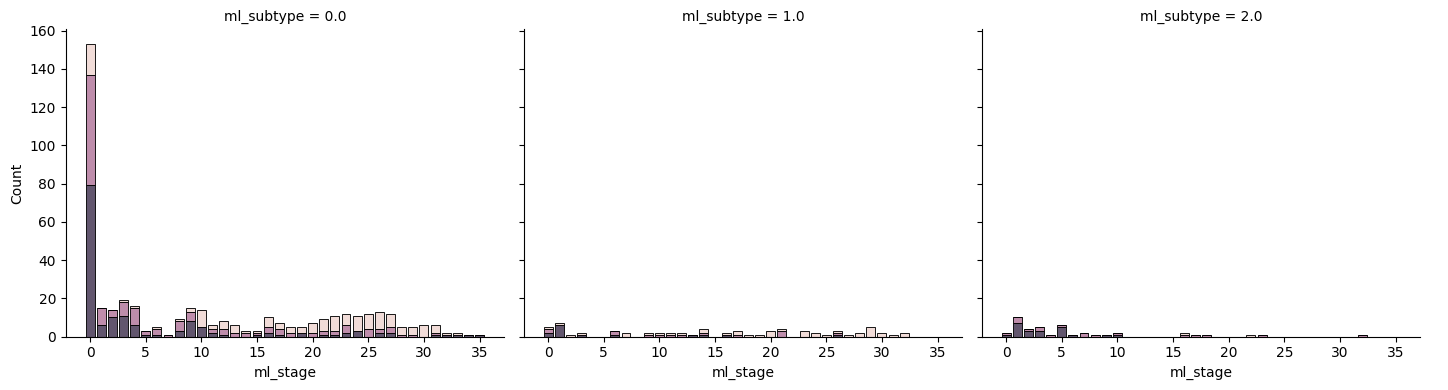

In [105]:
g = sns.FacetGrid(zdata, col="ml_subtype", height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x="ml_stage", hue="DX", multiple="stack", discrete=True, shrink=0.8, legend=True)
g.add_legend()
plt.show()